# Clean datas csv

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df_houses_datas_prototype = pd.read_csv("houses_datas.csv")

# Voir rapidement l'ensemble du fichier avec les colonnes
df_houses_datas_prototype.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
df_houses_datas_prototype['bedrooms'].describe()

count    21613.000000
mean         3.370842
std          0.930062
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

### Vérification des duplications

In [3]:
#df_houses_datas_prototype["id"].duplicated().value_counts()
df_houses_datas_prototype[df_houses_datas_prototype.duplicated(['id'], keep=False)]
df_houses_datas_prototype.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Maintenant je veux changer le format des dates en quelque chose de plus lisible :

In [4]:
# Au cas-où je reconverti la date
df_houses_datas_prototype['date'] = pd.to_datetime(df_houses_datas_prototype['date'], format='%Y-%m')

# Je veux seulement la date
df_houses_datas_prototype['date'] = df_houses_datas_prototype['date'].dt.date

# Vérification des dates si l'ordre croissant fonctionne
df_houses_datas_prototype.head(500)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,9828702519,2014-05-12,490000.0,2,2.50,1230,1391,2.0,0,0,...,8,870,360,2004,0,98112,47.6192,-122.301,1240,1350
496,4432600075,2015-01-28,725000.0,4,2.00,2110,4140,2.0,0,0,...,9,1710,400,1925,2003,98116,47.5836,-122.387,1440,4420
497,7806300030,2014-09-17,299000.0,3,2.75,3080,19635,1.0,0,2,...,7,1610,1470,1958,0,98032,47.3841,-122.284,2424,12410
498,9274202270,2014-08-18,625000.0,2,1.50,1490,5750,1.5,0,0,...,7,1190,300,1900,0,98116,47.5872,-122.390,1590,4025


### Graphique scatterplot

<Axes: xlabel='sqft_living', ylabel='price'>

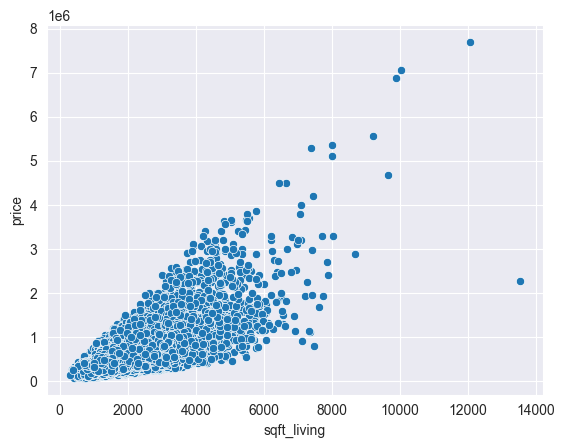

In [5]:
sns.scatterplot(data=df_houses_datas_prototype, x='sqft_living', y='price')

<Axes: xlabel='sqft_living15', ylabel='price'>

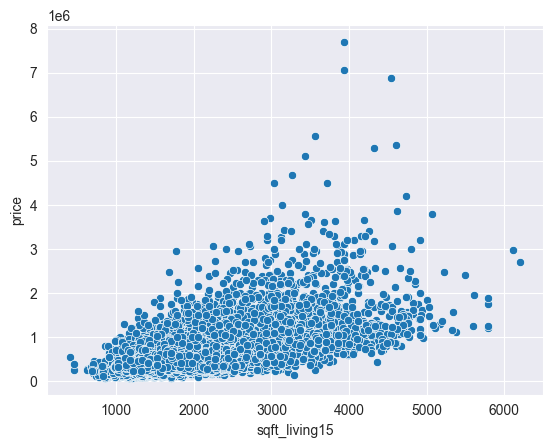

In [6]:
sns.scatterplot(data=df_houses_datas_prototype, x='sqft_living15', y='price')

<Axes: xlabel='zipcode', ylabel='price'>

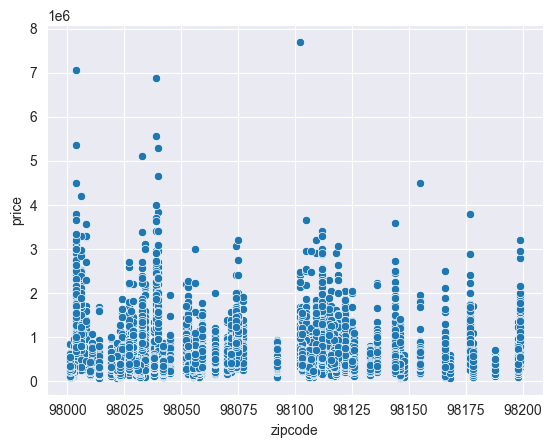

In [7]:
sns.scatterplot(data=df_houses_datas_prototype, x='zipcode', y='price')

<Axes: xlabel='bedrooms', ylabel='price'>

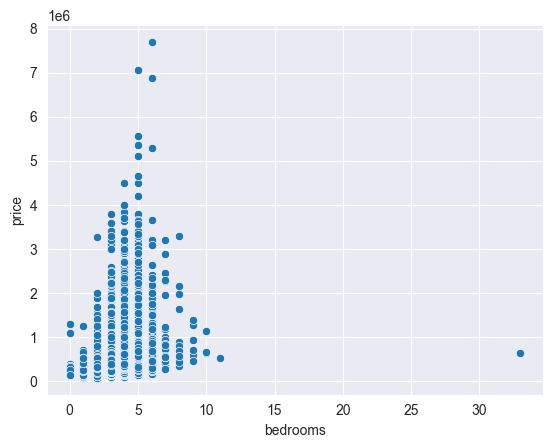

In [8]:
sns.scatterplot(data=df_houses_datas_prototype, x='bedrooms', y='price')

<Axes: xlabel='bathrooms', ylabel='price'>

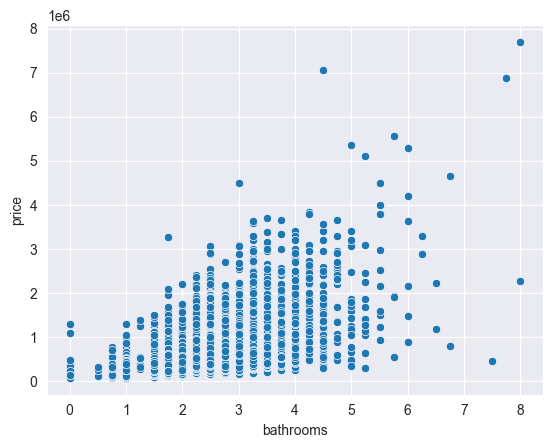

In [9]:
sns.scatterplot(data=df_houses_datas_prototype, x='bathrooms', y='price')

### Graphique barplot

<Axes: xlabel='zipcode', ylabel='price'>

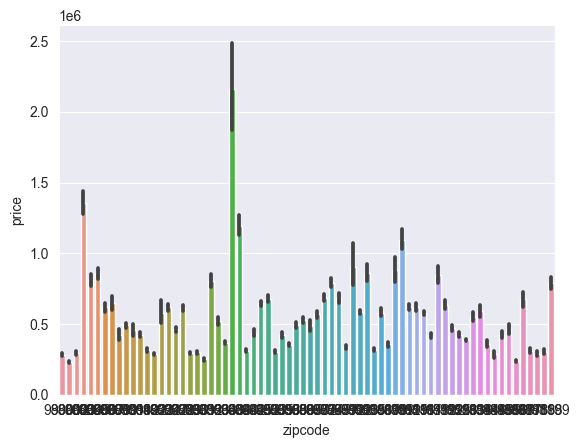

In [10]:
sns.barplot(data=df_houses_datas_prototype, x='zipcode', y='price')

<Axes: xlabel='grade', ylabel='price'>

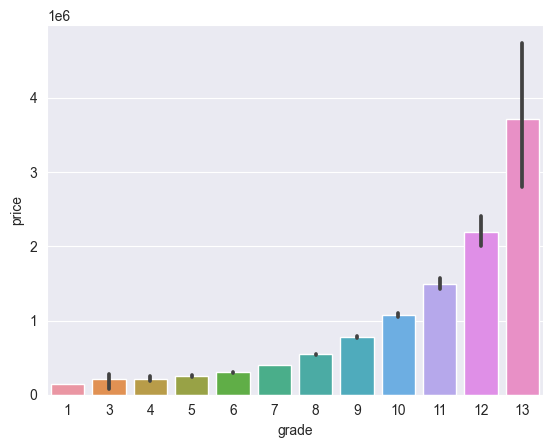

In [11]:
sns.barplot(data=df_houses_datas_prototype, x='grade', y='price')

<Axes: xlabel='condition', ylabel='price'>

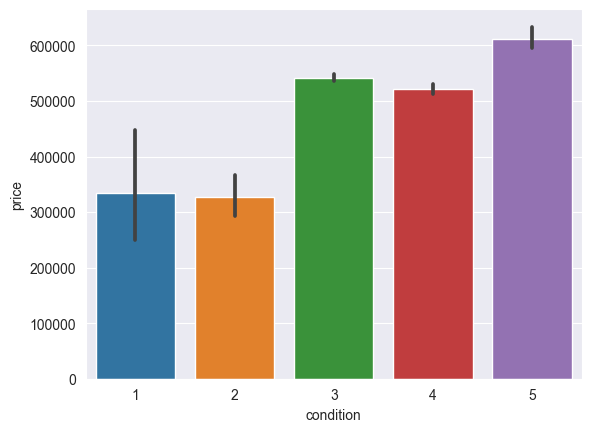

In [12]:
sns.barplot(data=df_houses_datas_prototype, x='condition', y='price')

<Axes: xlabel='waterfront', ylabel='price'>

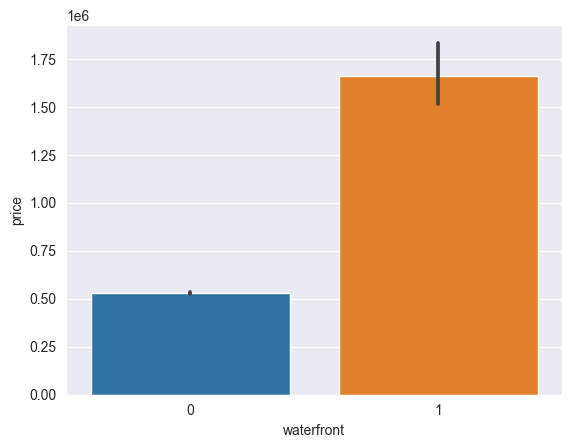

In [13]:
sns.barplot(data=df_houses_datas_prototype, x='waterfront', y='price')

<Axes: xlabel='view', ylabel='price'>

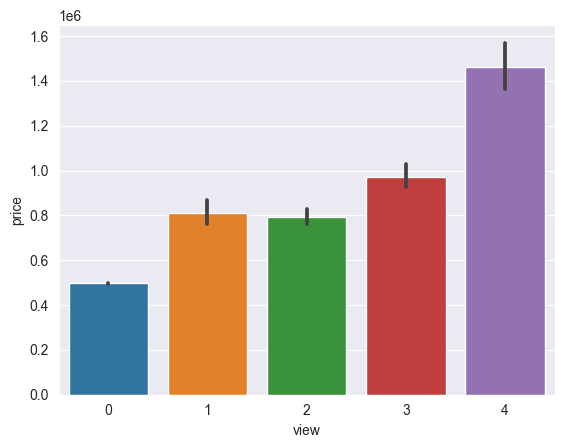

In [14]:
sns.barplot(data=df_houses_datas_prototype, x='view', y='price')

<Axes: xlabel='floors', ylabel='price'>

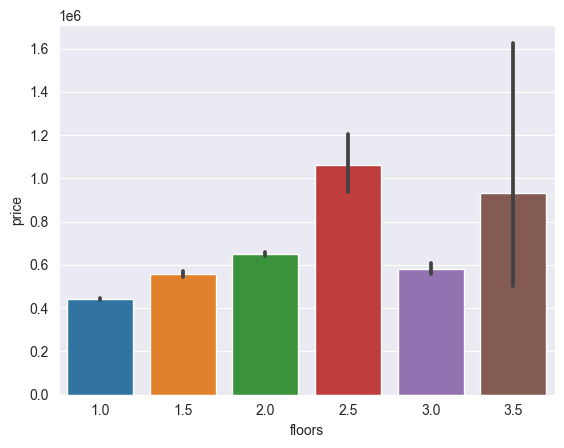

In [15]:
sns.barplot(data=df_houses_datas_prototype, x='floors', y='price')

### Graphique Stripplot

<Axes: xlabel='grade', ylabel='price'>

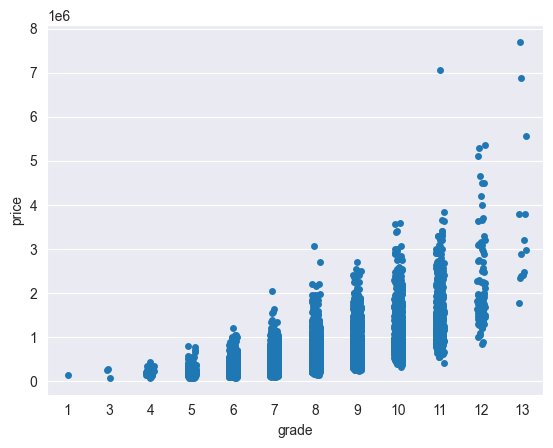

In [16]:
sns.stripplot(data=df_houses_datas_prototype, x='grade', y='price')

<Axes: xlabel='waterfront', ylabel='price'>

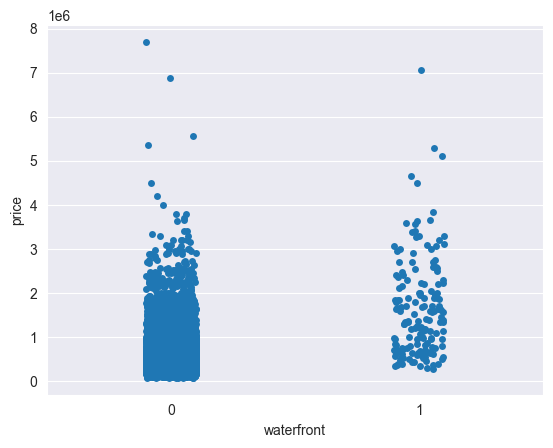

In [17]:
sns.stripplot(data=df_houses_datas_prototype, x='waterfront', y='price')

<Axes: xlabel='floors', ylabel='price'>

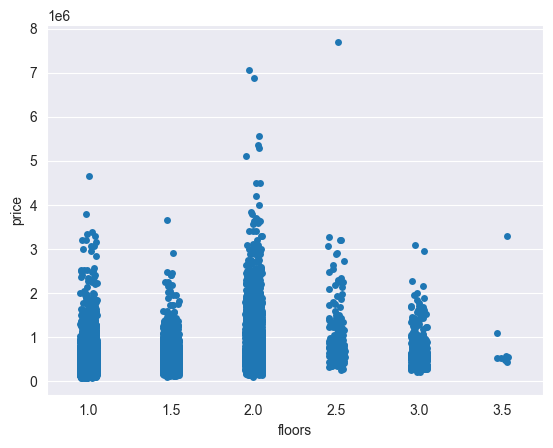

In [18]:
sns.stripplot(data=df_houses_datas_prototype, x='floors', y='price')

<Axes: xlabel='condition', ylabel='price'>

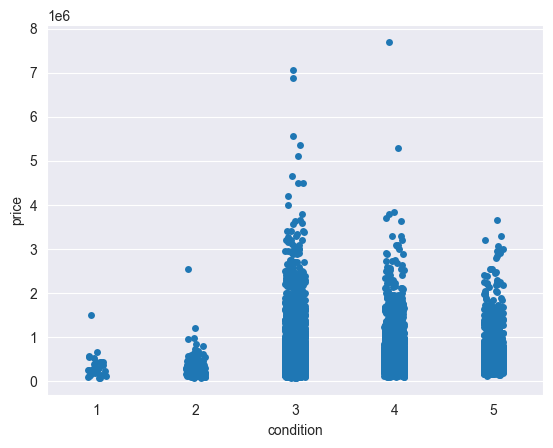

In [19]:
sns.stripplot(data=df_houses_datas_prototype, x='condition', y='price')

In [20]:
df_houses_datas_prototype = df_houses_datas_prototype.drop('id', axis=1)
df_houses_datas_prototype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

### Enregistrement du nouveau dataset

In [21]:
#df_houses_datas_prototype.to_csv("house_cleaned_datas.csv")

In [22]:
#df_houses_datas_prototype